**pandas demo**

_Евгений Борисов <esborisov@sevsu.ru>_

---

Pandas: Chart Visualization

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Формат таблиц в pandas   
https://habr.com/ru/post/521894/

In [1]:
import pandas as pd
import numpy as np
from numpy import random as rng

In [2]:
pd.options.display.max_colwidth = 200 # ширина таблицы pandas при печати
np.set_printoptions(precision=2) # вывод на печать до 2 знака

## eurostat

In [3]:
# !pip install eurostat

In [4]:
# статистика по странам Евросоюза
# https://ec.europa.eu/eurostat
import eurostat

In [5]:
# список тем в источнике
toc = eurostat.get_toc_df().drop_duplicates()
toc.sample(10)

,title,code,type,last update of data,last table structure change,data start,data end
4240,Life expectancy at birth by sex and NUTS 2 region,TGS00101,dataset,2022-07-22T23:00:00+0200,2022-07-22T23:00:00+0200,2009,2020
3230,Landings of fishery products in Romania,FISH_LD_RO,dataset,2022-08-29T23:00:00+0200,2022-08-29T23:00:00+0200,2006,2021
3057,HICP - miscellaneous goods and services,TEICP120,dataset,2023-02-01T11:00:00+0100,2023-02-01T11:00:00+0100,2022-01,2022-12
6901,Train traffic on the rail network - North Macedonia (2020),RAIL_TF_NS20_MK,dataset,2023-02-02T23:00:00+0100,2023-02-02T23:00:00+0100,2020,2020
5523,"Reasons of non-participation in formal or informal voluntary activities, active citizenship in the last 12 months by sex, age and educational attainment level",ILC_SCP21,dataset,2019-03-22T11:00:00+0100,2021-02-08T23:00:00+0100,2015,2015
6753,Train traffic on the rail network - Slovakia (2010),RAIL_TF_NS10_SK,dataset,2017-03-31T23:00:00+0200,2021-02-08T23:00:00+0100,2010,2010
2074,Hours spent in CVT courses by type of CVT agreement and NACE Rev. 2 activity - hours per person employed in all enterprises,TRNG_CVT_28N2,dataset,2022-10-18T23:00:00+0200,2022-10-18T23:00:00+0200,2010,2020
1958,Participants in CVT courses by type of CVT planning and size class - % of persons employed in all enterprises,TRNG_CVT_14S,dataset,2022-10-18T23:00:00+0200,2022-10-18T23:00:00+0200,2005,2020
3471,Innovation activities and expenditures in the enterprises by NACE Rev. 2 activity and size class,INN_CIS9_EXP,dataset,2021-04-23T23:00:00+0200,2021-02-08T23:00:00+0100,2014,2014
2404,"Disabled people by sex, need for assistance and having a longstanding health problem",HLTH_DPEH170,dataset,2015-05-18T23:00:00+0200,2021-02-08T23:00:00+0100,2012,2012


In [6]:
# Animal populations by NUTS 2 regions
df = eurostat.get_data_df('tgs00045')
display(len(df))
df.sample(10)

1193

,freq,animals,unit,geo\TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,A,A2000,THS_HD,AT22,328.58,323.05,322.47,323.15,322.89,322.29,319.58,319.72,315.52,308.43,304.43,NaN
1189,A,A4200,THS_HD,SK02,9.20,9.37,9.41,9.53,9.44,9.50,9.61,9.15,8.91,NaN,NaN,NaN
1175,A,A4200,THS_HD,RS12,NaN,NaN,NaN,53.61,52.65,45.01,46.00,48.00,46.00,50.00,49.00,NaN
307,A,A2300F,THS_HD,EL51,18.30,20.10,19.40,18.20,16.40,14.60,13.90,13.90,14.10,12.20,9.70,NaN
646,A,A3100,THS_HD,HU10,133.00,99.00,103.00,178.00,186.00,193.00,211.00,196.00,167.00,189.00,46.20,NaN
907,A,A4100,THS_HD,LT02,NaN,NaN,86.30,106.40,124.80,139.10,144.50,138.50,128.10,118.10,115.00,NaN
676,A,A3100,THS_HD,ITH2,10.35,5.36,4.48,6.99,7.79,7.28,8.00,8.70,8.66,10.87,10.00,NaN
881,A,A4100,THS_HD,IS00,475.10,473.50,473.50,NaN,NaN,473.00,458.00,432.00,416.00,401.00,385.00,NaN
1082,A,A4200,THS_HD,HR03,30.20,NaN,31.30,27.40,30.40,45.80,47.40,52.00,51.40,54.50,53.90,NaN
364,A,A2300F,THS_HD,FRL0,7.87,8.00,8.00,7.00,7.00,7.00,7.07,6.77,6.65,6.54,6.51,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             1193 non-null   object 
 1   animals          1193 non-null   object 
 2   unit             1193 non-null   object 
 3   geo\TIME_PERIOD  1193 non-null   object 
 4   2011             1046 non-null   float64
 5   2012             1012 non-null   float64
 6   2013             990 non-null    float64
 7   2014             949 non-null    float64
 8   2015             973 non-null    float64
 9   2016             1017 non-null   float64
 10  2017             972 non-null    float64
 11  2018             956 non-null    float64
 12  2019             960 non-null    float64
 13  2020             941 non-null    float64
 14  2021             930 non-null    float64
 15  2022             56 non-null     float64
dtypes: float64(12), object(4)
memory usage: 149.2+ KB


<AxesSubplot: title={'center': 'A / A4100 / THS_HD'}>

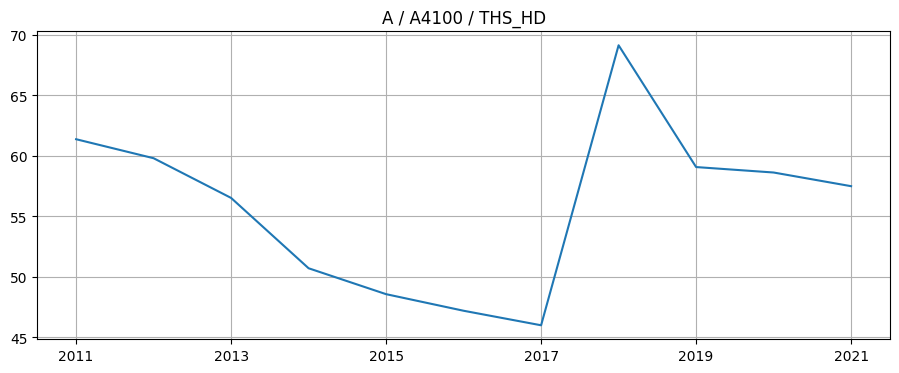

In [8]:
n = rng.randint(len(df)) # выбираем запись
title = ' / '.join( df.iloc[n,:3].to_list() )
df.iloc[n,4:].plot(grid=True,figsize=(11,4), title=title)

## wikipedia

https://en.wikipedia.org/wiki/Demographics_of_India

In [9]:
df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_India')
display( len(df) )

38

In [11]:
df_ = df[8]
df_

,Rank,State/UT,Population[54],Percent (%),Male,Female,Difference between male and female,Sex ratio,Rural[55],Urban[55],Area[56] (km2),Density (per km2)
0,1,Uttar Pradesh,199812341,16.50,104480510,95331831,9148679,930,155111022,44470455,240928,828
1,2,Maharashtra,112374333,9.28,58243056,54131277,4111779,929,61545441,50827531,307713,365
2,3,Bihar,104099452,8.60,54278157,49821295,4456862,918,92075028,11729609,94163,1102
3,4,West Bengal,91276115,7.54,46809027,44467088,2341939,950,62213676,29134060,88752,1030
4,5,Madhya Pradesh,72626809,6.00,37612306,35014503,2597803,931,52537899,20059666,308245,236
5,6,Tamil Nadu,72147030,5.96,36137975,36009055,128920,996,37189229,34949729,130058,555
6,7,Rajasthan,68548437,5.66,35550997,32997440,2553557,928,51540236,17080776,342239,201
7,8,Karnataka,61095297,5.05,30966657,30128640,838017,973,37552529,23578175,191791,319
8,9,Gujarat,60439692,4.99,31491260,28948432,2542828,919,34670817,25712811,196024,308
9,10,Andhra Pradesh,49386799,4.08,24738068,24648731,89337,996,34776389,14610410,160205,308


In [12]:
df_ = df_[   df_['State/UT']!='Total (India)'  ]

In [13]:
display(df_.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                36 non-null     object 
 1   State/UT                            36 non-null     object 
 2   Population[54]                      36 non-null     int64  
 3   Percent (%)                         36 non-null     float64
 4   Male                                36 non-null     int64  
 5   Female                              36 non-null     int64  
 6   Difference between male and female  36 non-null     object 
 7   Sex ratio                           36 non-null     int64  
 8   Rural[55]                           36 non-null     int64  
 9   Urban[55]                           36 non-null     int64  
 10  Area[56] (km2)                      36 non-null     int64  
 11  Density (per km2)                   36 non-null

None

In [14]:
df_ = df_.convert_dtypes()
display(df_.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                36 non-null     string 
 1   State/UT                            36 non-null     string 
 2   Population[54]                      36 non-null     Int64  
 3   Percent (%)                         36 non-null     Float64
 4   Male                                36 non-null     Int64  
 5   Female                              36 non-null     Int64  
 6   Difference between male and female  36 non-null     string 
 7   Sex ratio                           36 non-null     Int64  
 8   Rural[55]                           36 non-null     Int64  
 9   Urban[55]                           36 non-null     Int64  
 10  Area[56] (km2)                      36 non-null     Int64  
 11  Density (per km2)                   36 non-null

None

<AxesSubplot: ylabel='State/UT'>

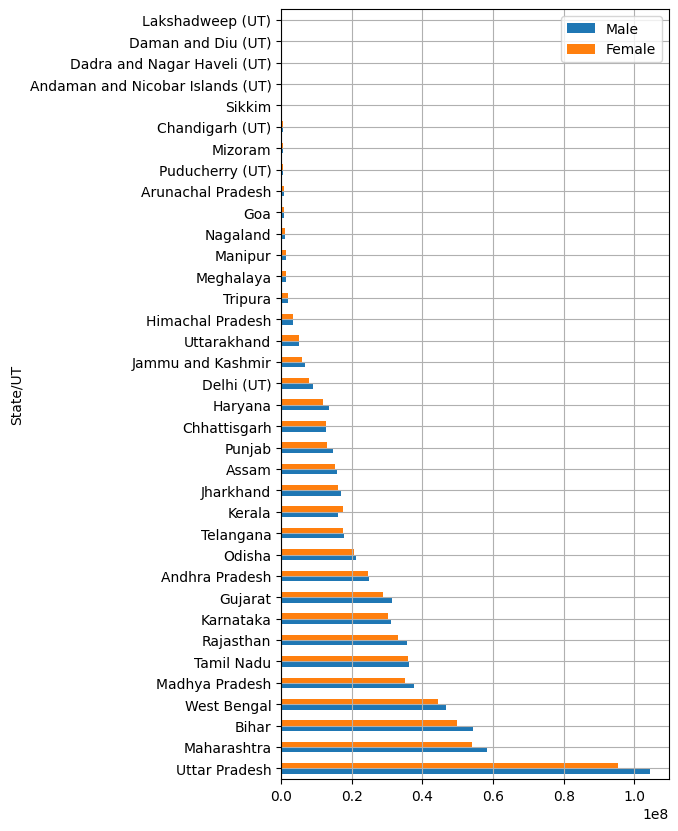

In [15]:
(
df_[['State/UT','Male','Female']]
.set_index('State/UT')
.plot.barh(figsize=(5,10),grid=True)
)

In [16]:
col = 'Difference between male and female'
df_[col] = pd.to_numeric(df_[col].str.replace(',','').str.replace('−','-'))

In [17]:
df_.style.bar(
    subset=[col],
      align='mid',
      color=['coral', 'yellowgreen'],
      vmin=df_[col].min(),
      vmax=df_[col].max()
     )

,Rank,State/UT,Population[54],Percent (%),Male,Female,Difference between male and female,Sex ratio,Rural[55],Urban[55],Area[56] (km2),Density (per km2)
0,1,Uttar Pradesh,199812341,16.500000,104480510,95331831,9148679,930,155111022,44470455,240928,828
1,2,Maharashtra,112374333,9.280000,58243056,54131277,4111779,929,61545441,50827531,307713,365
2,3,Bihar,104099452,8.600000,54278157,49821295,4456862,918,92075028,11729609,94163,1102
3,4,West Bengal,91276115,7.540000,46809027,44467088,2341939,950,62213676,29134060,88752,1030
4,5,Madhya Pradesh,72626809,6.000000,37612306,35014503,2597803,931,52537899,20059666,308245,236
5,6,Tamil Nadu,72147030,5.960000,36137975,36009055,128920,996,37189229,34949729,130058,555
6,7,Rajasthan,68548437,5.660000,35550997,32997440,2553557,928,51540236,17080776,342239,201
7,8,Karnataka,61095297,5.050000,30966657,30128640,838017,973,37552529,23578175,191791,319
8,9,Gujarat,60439692,4.990000,31491260,28948432,2542828,919,34670817,25712811,196024,308
9,10,Andhra Pradesh,49386799,4.080000,24738068,24648731,89337,996,34776389,14610410,160205,308


In [18]:
df_[['Male','Female']].describe().T

,count,mean,std,min,25%,50%,75%,max
Male,36.0,17310287.75,22360878.93512,33123.0,732833.0,10860110.5,26295215.25,104480510.0
Female,36.0,16321794.944444,20700554.819702,31350.0,707007.5,9828671.5,25723656.25,95331831.0


---

**упражнения**

https://github.com/ajcr/100-pandas-puzzles

---

In [19]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.7.0

eurostat: 1.0.1
numpy   : 1.23.5
pandas  : 1.5.2

